In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import zipcodes as zcode

In [10]:
df = pd.read_csv('Loan_Modelling.csv')

In [11]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
df.describe()

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

##PROBLEM STATMENT
#1.TO FIND OUT THE POTENTIAL COUSTOMER
#2.MOST SIGNIFICANT VARIABLE/FEATURE
#3.WHICH SEGMENT OF COUSTOMER SHOULD BE TARGETED TH E MOST

In [14]:
df.drop('ID',axis=1,inplace=True)

In [15]:
df.sample(5)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
3547   46          20      84    92354       3    0.7          2         0   
4301   49          24     130    92677       4    1.1          1       281   
3087   57          33      15    94303       2    0.3          1         0   
3485   39          13      39    92103       2    0.8          3         0   
4704   54          28     102    91360       3    1.7          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
3547              0                   0           0       1           0  
4301              1                   0           1       1           0  
3087              0                   0           0       1           0  
3485              0                   0           0       0           0  
4704              0                   0           0       1           0

In [16]:
print('Number of unique values:\n------------------------------------\n',df.nunique(),sep='')

Number of unique values:
------------------------------------
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64


In [17]:
print('Unique data for all\n')
for c in df.columns:
    print(c,df[c].unique(),'',sep='\n----------------\n')

Unique data for all

Age
----------------
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
----------------

Experience
----------------
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
----------------

Income
----------------
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192

In [18]:
cat_cols = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']
cont_cols = ['Age','Income','Experience','CCAvg','Mortgage']

#2 PREPROCESSING

In [19]:
#viewing negative experience
df[df['Experience']<0]

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
89     25          -1     113    94303       4   2.30          3         0   
226    24          -1      39    94085       2   1.70          2         0   
315    24          -2      51    90630       3   0.30          3         0   
451    28          -2      48    94132       2   1.75          3        89   
524    24          -1      75    93014       4   0.20          1         0   
536    25          -1      43    92173       3   2.40          2       176   
540    25          -1     109    94010       4   2.30          3       314   
576    25          -1      48    92870       3   0.30          3         0   
583    24          -1      38    95045       2   1.70          2         0   
597    24          -2     125    92835       2   7.20          1         0   
649    25          -1      82    92677       4   2.10          3         0   
670    23          -1      61    92374       4   2.60          1       239   
686    24          -1      38    92612       4   0.60          2         0   
793    24          -2     150    94720       2   2.00          1         0   
889    24          -2      82    91103       2   1.60          3         0   
909    23          -1     149    91709       1   6.33          1       305   
1173   24          -1      35    94305       2   1.70          2         0   
1428   25          -1      21    94583       4   0.40          1        90   
1522   25          -1     101    94720       4   2.30          3       256   
1905   25          -1     112    92507       2   2.00          1       241   
2102   25          -1      81    92647       2   1.60          3         0   
2430   23          -1      73    92120       4   2.60          1         0   
2466   24          -2      80    94105       2   1.60          3         0   
2545   25          -1      39    94720       3   2.40          2         0   
2618   23          -3      55    92704       3   2.40          2       145   
2717   23          -2      45    95422       4   0.60          2         0   
2848   24          -1      78    94720       2   1.80          2         0   
2876   24          -2      80    91107       2   1.60          3       238   
2962   23          -2      81    91711       2   1.80          2         0   
2980   25          -1      53    94305       3   2.40          2         0   
3076   29          -1      62    92672       2   1.75          3         0   
3130   23          -2      82    92152       2   1.80          2         0   
3157   23          -1      13    94720       4   1.00          1        84   
3279   26          -1      44    94901       1   2.00          2         0   
3284   25          -1     101    95819       4   2.10          3         0   
3292   25          -1      13    95616       4   0.40          1         0   
3394   25          -1     113    90089       4   2.10          3         0   
3425   23          -1      12    91605       4   1.00          1        90   
3626   24          -3      28    90089       4   1.00          3         0   
3796   24          -2      50    94920       3   2.40          2         0   
3824   23          -1      12    95064       4   1.00          1         0   
3887   24          -2     118    92634       2   7.20          1         0   
3946   25          -1      40    93117       3   2.40          2         0   
4015   25          -1     139    93106       2   2.00          1         0   
4088   29          -1      71    94801       2   1.75          3         0   
4116   24          -2     135    90065       2   7.20          1         0   
4285   23          -3     149    93555       2   7.20          1         0   
4411   23          -2      75    90291       2   1.80          2         0   
4481   25          -2      35    95045       4   1.00          3         0   
4514   24          -3      41    91768       4   1.00          3         0   
4582   25          -1      6

In [20]:
df[df['Experience']<0].groupby(['Age','Education'])['Experience'].count()

Age  Education
23   1             7
     2             5
24   1             5
     2             6
     3             6
25   1             4
     2             4
     3            10
26   2             1
28   3             1
29   3             3
Name: Experience, dtype: int64

In [21]:
df[df['Experience']<0].groupby(['Age','Education'])['Experience'].describe().T

Age              23                  24                       25       \
Education         1         2         1         2         3    1    2   
count      7.000000  5.000000  5.000000  6.000000  6.000000  4.0  4.0   
mean      -1.285714 -2.200000 -1.800000 -1.166667 -2.333333 -1.0 -1.0   
std        0.755929  0.447214  0.447214  0.408248  0.516398  0.0  0.0   
min       -3.000000 -3.000000 -2.000000 -2.000000 -3.000000 -1.0 -1.0   
25%       -1.000000 -2.000000 -2.000000 -1.000000 -2.750000 -1.0 -1.0   
50%       -1.000000 -2.000000 -2.000000 -1.000000 -2.000000 -1.0 -1.0   
75%       -1.000000 -2.000000 -2.000000 -1.000000 -2.000000 -1.0 -1.0   
max       -1.000000 -2.000000 -1.000000 -1.000000 -2.000000 -1.0 -1.0   

Age                    26   28   29  
Education          3    2    3    3  
count      10.000000  1.0  1.0  3.0  
mean       -1.100000 -1.0 -2.0 -1.0  
std         0.316228  NaN  NaN  0.0  
min        -2.000000 -1.0 -2.0 -1.0  
25%        -1.000000 -1.0 -2.0 -1.0  
50%        -1.000000 -1.0 -2.0 -1.0  
75%        -1.000000 -1.0 -2.0 -1.0  
max        -1.000000 -1.0 -2.0 -1.0

In [22]:
import numpy as np

df['Experience'] = df['Experience'].apply(lambda x: np.abs(x) if x<0 else x)

In [23]:
!pip install zipcodes

####WORKING ON ZIP CODE

In [24]:
zcode.matching('92691')

[{'zip_code': '92691',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Mission Viejo',
  'acceptable_cities': ['San Juan Capistrano', 'San Juan Capo'],
  'unacceptable_cities': [],
  'state': 'CA',
  'county': 'Orange County',
  'timezone': 'America/Los_Angeles',
  'area_codes': ['714', '949'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '33.6042',
  'long': '-117.6677'}]

In [25]:
zcode.matching('90065')

[{'zip_code': '90065',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Los Angeles',
  'acceptable_cities': ['Glassell', 'Glassell Park'],
  'unacceptable_cities': [],
  'state': 'CA',
  'county': 'Los Angeles County',
  'timezone': 'America/Los_Angeles',
  'area_codes': ['323'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '34.1115',
  'long': '-118.2286'}]

In [26]:
zcode.matching('90065')[0].get('county')

'Los Angeles County'

In [27]:
df['County'] = df['ZIPCode'].apply(lambda x: zcode.matching(str(x))[0].get('county') if len(zcode.matching(str(x))) else str(x))

In [28]:
df['County'].nunique()

42

In [29]:
df.sample(5)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
3340   29           3      54    94104       4    1.8          3         0   
114    39          14      39    92354       3    0.5          3         0   
4745   49          23     129    94085       1    0.3          1         0   
3293   44          20      62    94939       2    2.5          1         0   
4604   32           7      81    90601       2    3.4          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
3340              0                   0           0       0           0   
114               0                   0           0       1           0   
4745              0                   0           0       1           1   
3293              0                   1           0       1           0   
4604              1                   0           0       0           1   

                     County  
3340   San Francisco County  
114   San Bernardino County  
4745     Santa Clara County  
3293           Marin County  
4604     Los Angeles County

#1 EDA (PERCENTAGE OF DATA)

In [30]:
for col in cat_cols:
    print('Feature:',col)
    print(df[col].value_counts().sort_index())
    print()
    print('#'*20)
    print()
    

Feature: Family
1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64

####################

Feature: Education
1    2096
2    1403
3    1501
Name: Education, dtype: int64

####################

Feature: Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64

####################

Feature: CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64

####################

Feature: Online
0    2016
1    2984
Name: Online, dtype: int64

####################

Feature: CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64

####################

Feature: Personal_Loan
0    4520
1     480
Name: Personal_Loan, dtype: int64

####################



In [31]:
print(round(df['Personal_Loan'].value_counts()/len(df)*100,2))

0    90.4
1     9.6
Name: Personal_Loan, dtype: float64


In [32]:
import seaborn as sns

In [33]:
def plot_pie_count(col, r,c,n):
    plt.subplot(r,c,n)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(r,c,n+1)
    sns.countplot(x=col, data=df, hue='Personal_Loan')
                                  

In [34]:
len(cat_cols)

7

In [35]:
cat_cols

['Family',
 'Education',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard',
 'Personal_Loan']

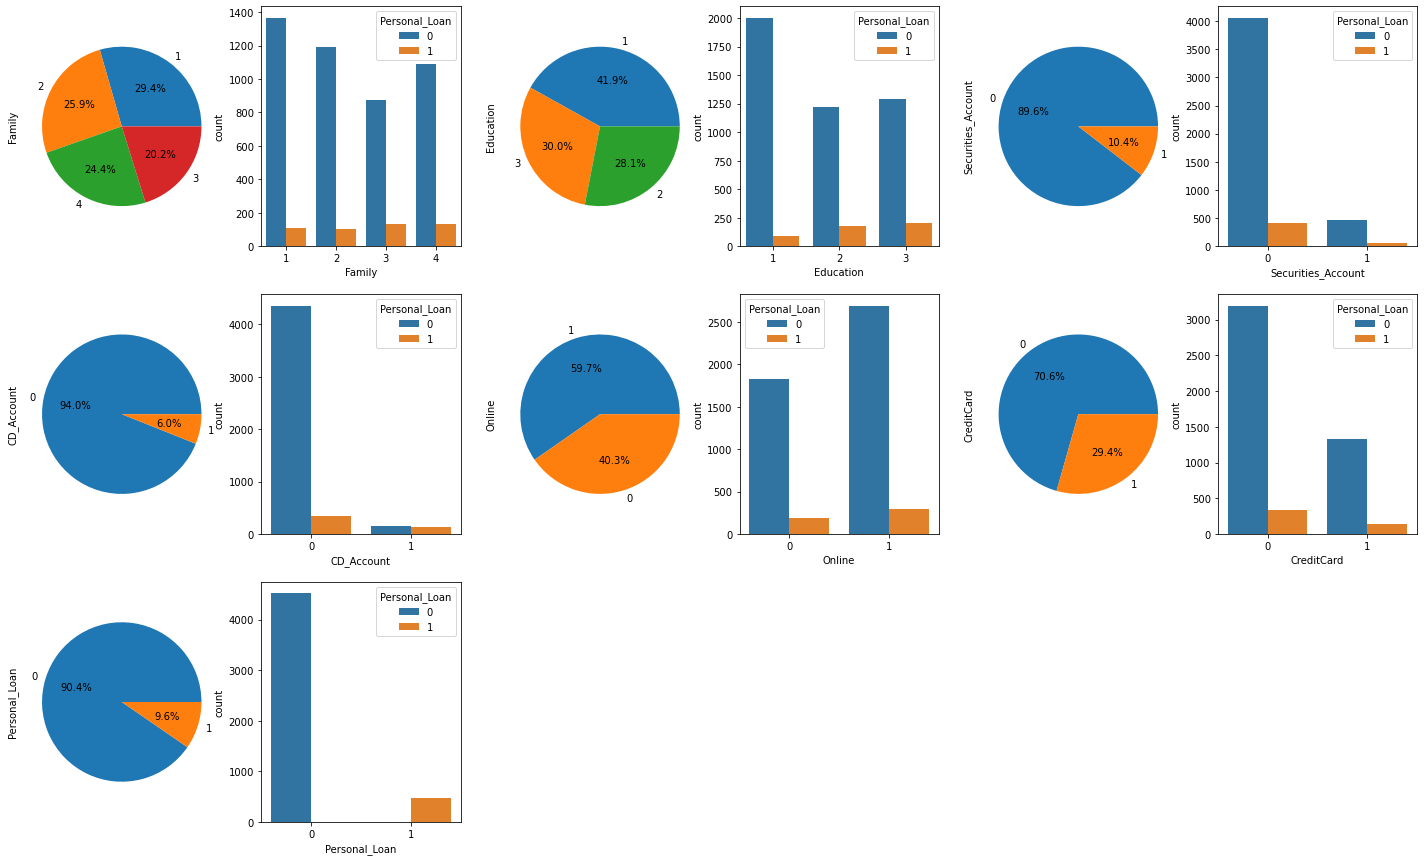

In [36]:
plt.figure(figsize=(25,15))
for i,c in enumerate(cat_cols):
    plot_pie_count(c,3,6,(i*2)+1)

In [37]:
def plot_dist(col,r,c,p):
    clr = ['orange','blue']
    for i in range(2):
        plt.subplot(r,c,p+i)
        mean = df[col][df['Personal_Loan']==i].mean()
        median = df[col][df['Personal_Loan']==i].median()
        mode = df[col][df['Personal_Loan']==i].mode().tolist()[0]
        plt.axvline(mean, color=clr[i], linestyle='--', linewidth=2)
        plt.axvline(median, color=clr[i], linestyle='-', linewidth=2)
        plt.axvline(mode, color=clr[i], linestyle='-.', linewidth=2)
        sns.histplot(df[col][df['Personal_Loan']==i], bins=20, color=clr[i])
        plt.legend({'Mean %.1f'%mean:mean, 'Meadian %.1f'%median:median, 'Mode %.1f'%mode : mode})
        plt.title(col+ '& Personal_Loan ={}'.format(i))
    

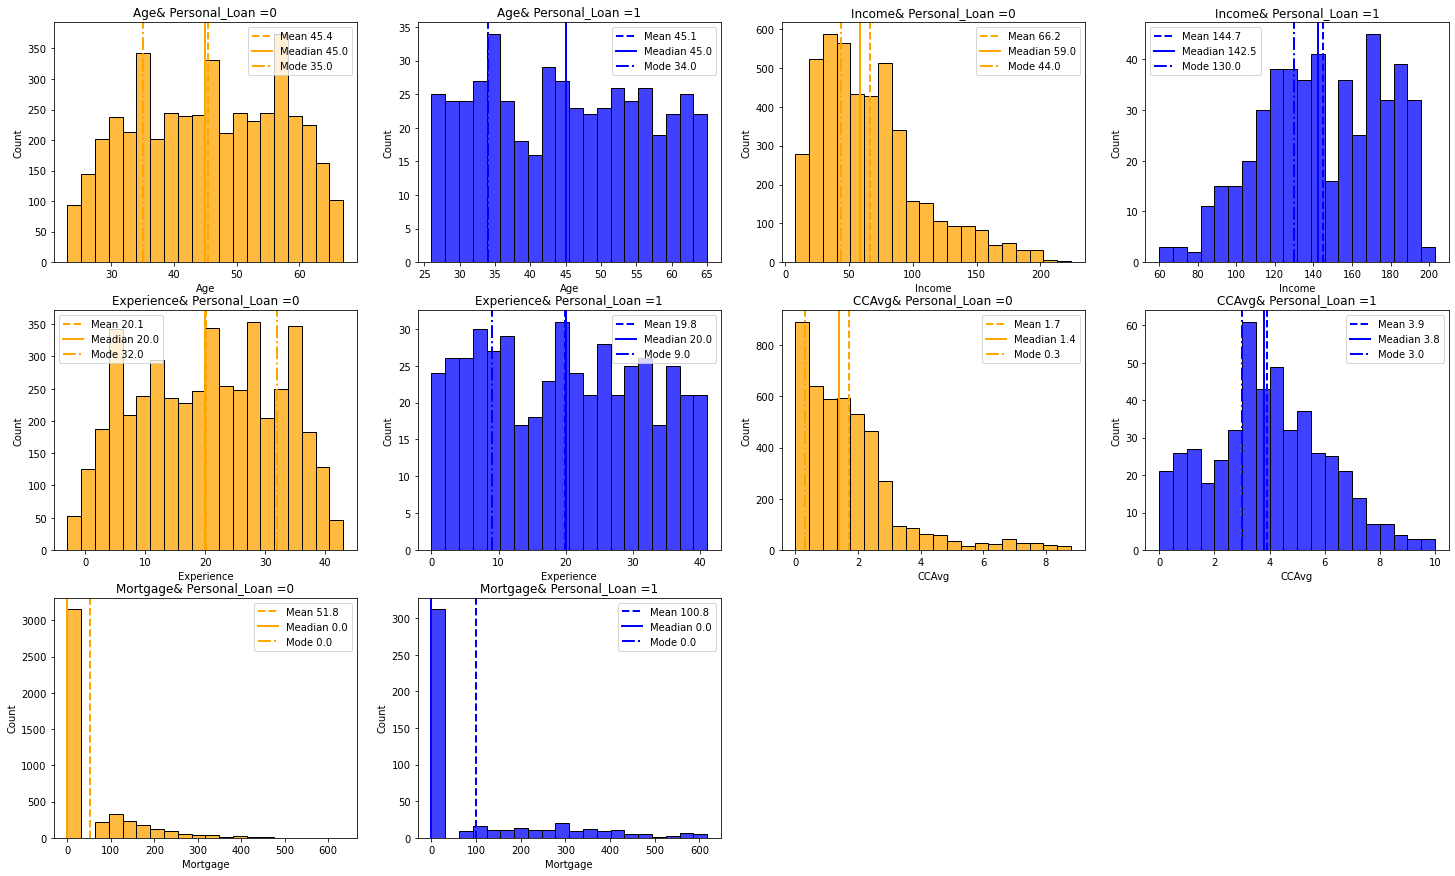

In [38]:
plt.figure(figsize=(25,15))
for i,c in enumerate(cont_cols):
    plot_dist(c,3,4,(i*2)+1)

In [39]:
df['County']= df ['County'].apply(lambda x:x.replace(' County' , ''))

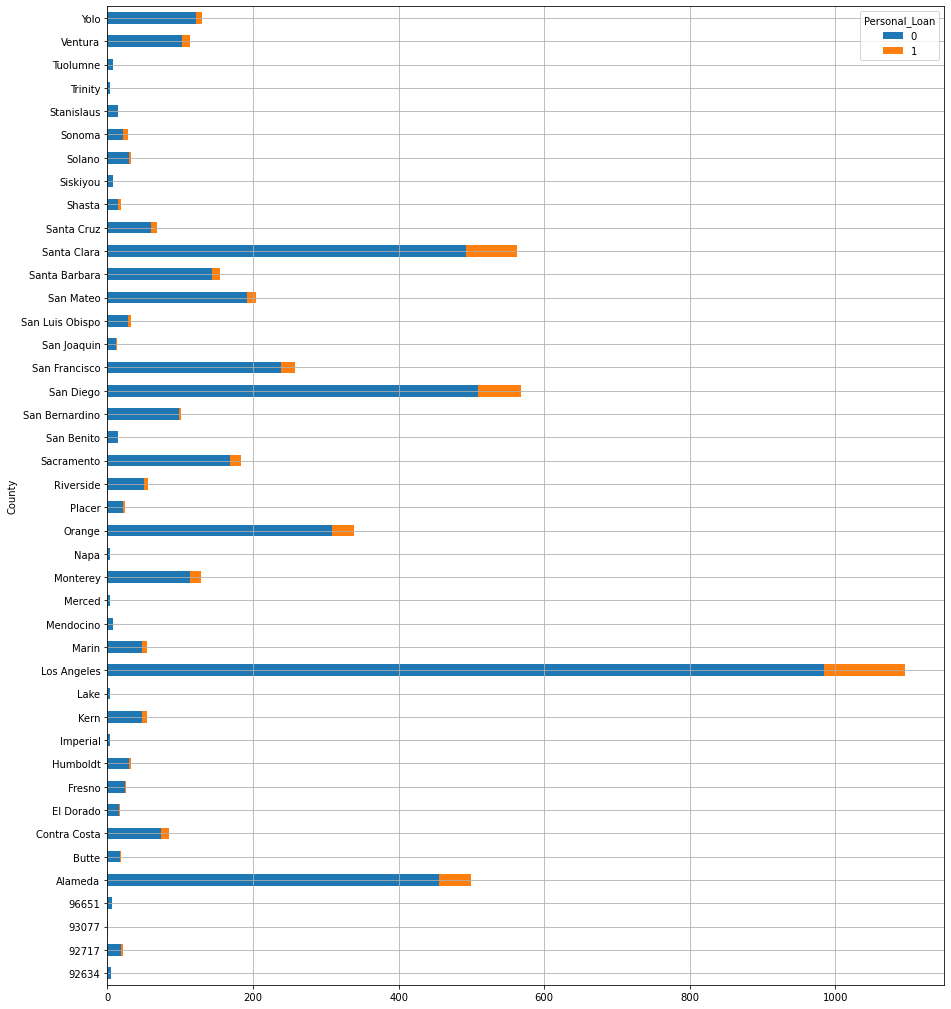

In [40]:
##plt.figure(figsize=(15,25))
pd.crosstab(index=df['County'],columns=df['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True, figsize=(15,18))
plt.grid()

In [41]:
c200 = df['County'].value_counts()>200
c200

Los Angeles         True
San Diego           True
Santa Clara         True
Alameda             True
Orange              True
San Francisco       True
San Mateo           True
Sacramento         False
Santa Barbara      False
Yolo               False
Monterey           False
Ventura            False
San Bernardino     False
Contra Costa       False
Santa Cruz         False
Riverside          False
Kern               False
Marin              False
Solano             False
San Luis Obispo    False
Humboldt           False
Sonoma             False
Fresno             False
Placer             False
92717              False
Butte              False
Shasta             False
El Dorado          False
Stanislaus         False
San Benito         False
San Joaquin        False
Mendocino          False
Siskiyou           False
Tuolumne           False
96651              False
92634              False
Lake               False
Trinity            False
Merced             False
Imperial           False


In [42]:
df['County'].unique()


array(['Los Angeles', 'Alameda', 'San Francisco', 'San Diego', 'Monterey',
       'Ventura', 'Santa Barbara', 'Marin', 'Santa Clara', 'Santa Cruz',
       'San Mateo', 'Humboldt', 'Contra Costa', 'Orange', 'Sacramento',
       'Yolo', 'Placer', 'San Bernardino', 'San Luis Obispo', 'Riverside',
       'Kern', '92717', 'Fresno', 'Sonoma', 'El Dorado', 'San Benito',
       'Butte', 'Solano', '93077', 'Mendocino', '92634', 'San Joaquin',
       '96651', 'Imperial', 'Siskiyou', 'Merced', 'Trinity', 'Stanislaus',
       'Shasta', 'Tuolumne', 'Napa', 'Lake'], dtype=object)

In [43]:
c200 = df.groupby('County')['County'].count()
c200

County
92634                 5
92717                22
93077                 1
96651                 6
Alameda             500
Butte                19
Contra Costa         85
El Dorado            17
Fresno               26
Humboldt             32
Imperial              3
Kern                 54
Lake                  4
Los Angeles        1095
Marin                54
Mendocino             8
Merced                4
Monterey            128
Napa                  3
Orange              339
Placer               24
Riverside            56
Sacramento          184
San Benito           14
San Bernardino      101
San Diego           568
San Francisco       257
San Joaquin          13
San Luis Obispo      33
San Mateo           204
Santa Barbara       154
Santa Clara         563
Santa Cruz           68
Shasta               18
Siskiyou              7
Solano               33
Sonoma               28
Stanislaus           15
Trinity               4
Tuolumne              7
Ventura             114
Yolo     

In [44]:
c200 = df['County'].value_counts().index[df['County'].value_counts()>200]
c200

Index(['Los Angeles', 'San Diego', 'Santa Clara', 'Alameda', 'Orange',
       'San Francisco', 'San Mateo'],
      dtype='object')

In [45]:
df['CountyGroup'] = df['County'].apply(lambda x:x if x in c200 else 'Other')

In [46]:
df.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

          County    CountyGroup  
0    Los Angeles    Los Angeles  
1    Los Angeles    Los Angeles  
2        Alameda        Alameda  
3  San Francisco  San Francisco  
4    Los Angeles    Los Angeles

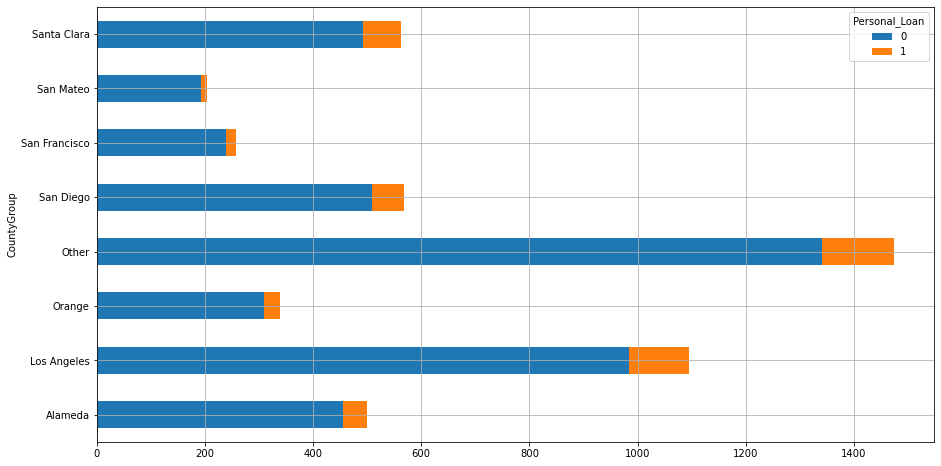

In [47]:
pd.crosstab(index=df['CountyGroup'],columns=df['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True, figsize=(15,8))
plt.grid()

<AxesSubplot:>

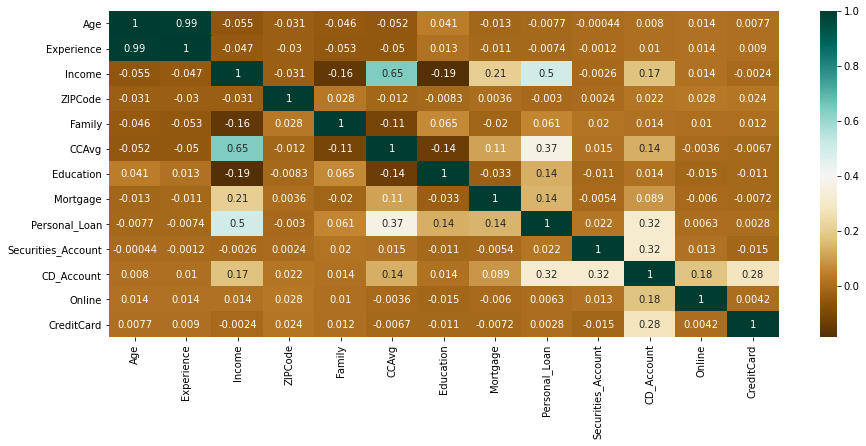

In [48]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='BrBG',annot=True)

outliers&REvoval

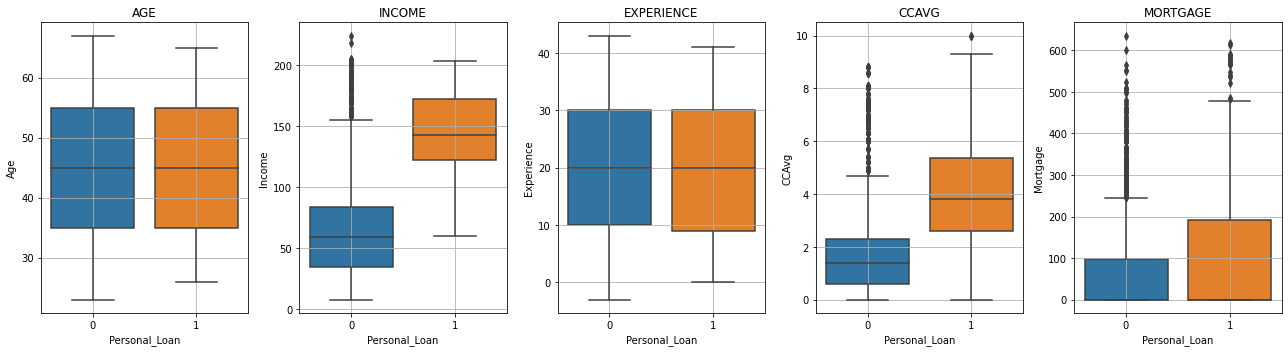

In [49]:
plt.figure(figsize=(18,5))
for i,c in enumerate(cont_cols):
    plt.subplot(1,5,i+1)
    sns.boxplot(x='Personal_Loan', y=c, data=df)
    #sns.boxplot(df[c],whis=1.5)
    plt.tight_layout()
    plt.title(c.upper())
    plt.grid()

In [50]:
income = df['Income'].copy()

In [51]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Income'>

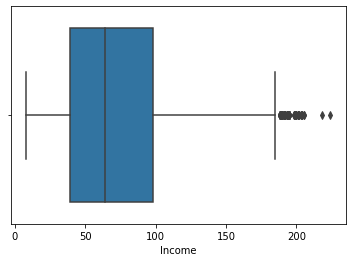

In [52]:
sns.boxplot(income)

In [53]:
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)
IQR = Q3-Q1
print ('IQR is:',IQR)

IQR is: 59.0


In [54]:
Q1

39.0

In [55]:
first_q = Q1-1.5*IQR
third_q = Q3+1.5*IQR
print(first_q)
print(third_q)

-49.5
186.5


In [56]:
income1 = income[(income<=third_q)&(income>=first_q)]

<AxesSubplot:xlabel='Income'>

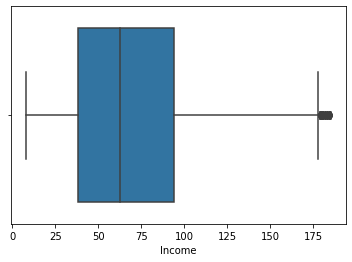

In [57]:
sns.boxplot(income1)

In [58]:
sum((income<=third_q)&(income>=first_q))

4904

#! PREPARE THE DATA FOR TRAINING

In [59]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County', 'CountyGroup'],
      dtype='object')

In [60]:
x = df[['Age','Income','Experience','CCAvg','Mortgage','Family','Education','Securities_Account','CD_Account','Online','CreditCard']]
y = df['Personal_Loan']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=101)

#MACHINE LEARNING

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [64]:
model_log = LogisticRegression().fit(xtrain,ytrain)
model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
model_rf = RandomForestClassifier().fit(xtrain,ytrain)
model_svc = SVC().fit(xtrain,ytrain)

In [65]:
model_log.score(xtest,ytest)

0.9464

In [66]:
model_dt.score(xtest,ytest)

0.98

In [67]:
model_rf.score(xtest,ytest)

0.988

In [68]:
model_svc.score(xtest,ytest)

0.9144

#class weights
#statsmodel
 #performance evaluation ROC-AUC confusionmatrix R2Score Classification report
#feature importances
#grid search cross validation: hyperparameter tuning
#kfold  cross validation
#bagging approach
#boost approach


In [71]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import scipy.stats as stats
import statsmodels.api as sm

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
pd.DataFrame(model_log.coef_, index=['coefficient'],columns = x.columns).T

coefficient
Age                   -0.503454
Income                 0.050705
Experience             0.507571
CCAvg                  0.104489
Mortgage               0.001186
Family                 0.651946
Education              1.669727
Securities_Account     0.257381
CD_Account             2.740868
Online                -0.559285
CreditCard            -0.421215

In [107]:
model_log = LogisticRegression().fit(xtrain,ytrain)

In [108]:
sns.set_style('whitegrid')

In [121]:
def performance(xt, yt, model):
    yp = model.predict(xt)
    print('Classification Report')
    print('-'*30)
    print('R2-Score:',model_log.score(xt,yt))
    print(classification_report(yt,yp))
    print('-'*30)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(pd.DataFrame(confusion_matrix(yt,yp),index=['No','Yes'],columns=['No','Yes']),annot=True,fmt='d')
    plt.title('Confusion matrix')
    rocAuc = roc_auc_score(yt, yp)
    fpr,tpr,th = roc_curve(yt, yp)
    plt.subplot(1,2,2)
    plt.plot(fpr, tpr, label = ' Model (area=%0.2f)'%rocAuc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title('ROC Curve')
    

    plt.show()

Classification Report
------------------------------
R2-Score: 0.9464
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1137
           1       0.81      0.53      0.64       113

    accuracy                           0.95      1250
   macro avg       0.88      0.76      0.81      1250
weighted avg       0.94      0.95      0.94      1250

------------------------------


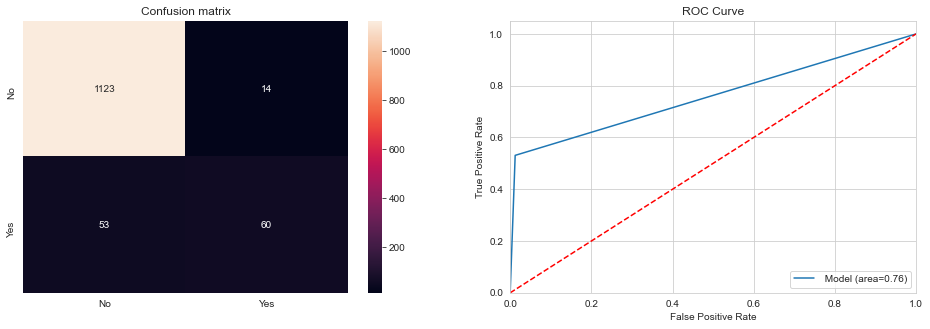

In [122]:
performance(xtest, ytest, model_log)

Classification Report
------------------------------
R2-Score: 0.9464
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1137
           1       0.81      0.53      0.64       113

    accuracy                           0.95      1250
   macro avg       0.88      0.76      0.81      1250
weighted avg       0.94      0.95      0.94      1250

------------------------------


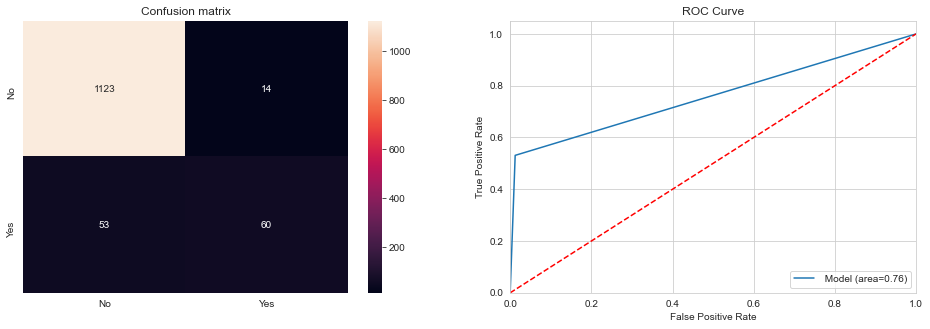

In [152]:
performance(xtest,ytest, model_log)

Classification Report
------------------------------
R2-Score: 0.9464
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.90      0.88      0.89       113

    accuracy                           0.98      1250
   macro avg       0.94      0.93      0.94      1250
weighted avg       0.98      0.98      0.98      1250

------------------------------


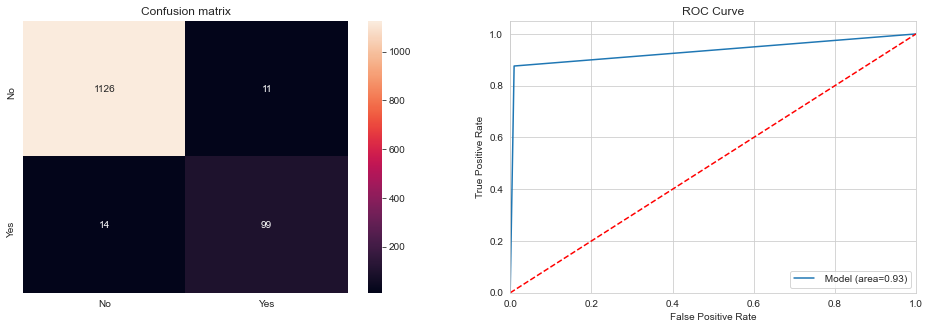

In [153]:

performance(xtest,ytest, model_dt)

Classification Report
------------------------------
R2-Score: 0.9464
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1137
           1       0.67      0.11      0.18       113

    accuracy                           0.91      1250
   macro avg       0.79      0.55      0.57      1250
weighted avg       0.90      0.91      0.89      1250

------------------------------


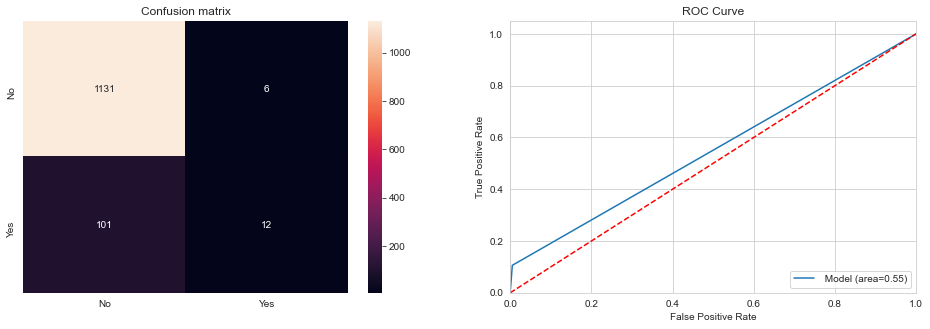

In [124]:
performance(xtest,ytest, model_svc)

Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.90      0.88      0.89       113

    accuracy                           0.98      1250
   macro avg       0.94      0.93      0.94      1250
weighted avg       0.98      0.98      0.98      1250

------------------------------


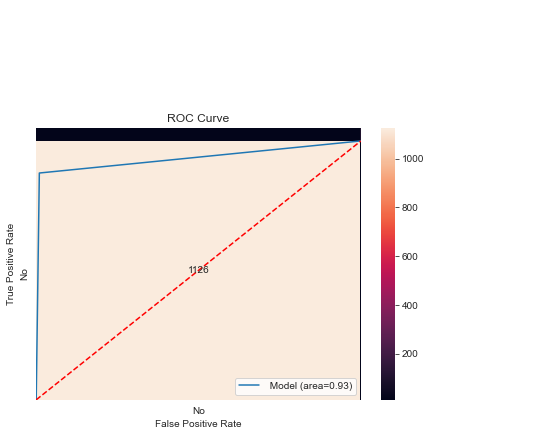

In [112]:
performance(xtest,ytest, model_dt)

Classification Report
------------------------------
R2-Score: 0.9464
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1137
           1       1.00      0.87      0.93       113

    accuracy                           0.99      1250
   macro avg       0.99      0.93      0.96      1250
weighted avg       0.99      0.99      0.99      1250

------------------------------


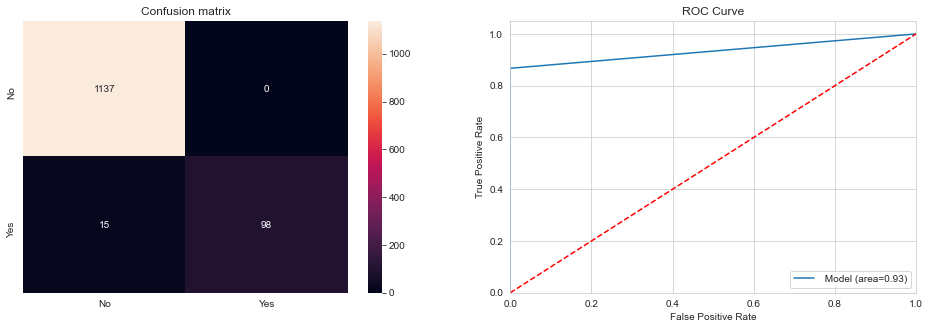

In [154]:
performance(xtest,ytest, model_rf)

Classification Report
------------------------------
R2-Score: 0.9464
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1137
           1       0.67      0.11      0.18       113

    accuracy                           0.91      1250
   macro avg       0.79      0.55      0.57      1250
weighted avg       0.90      0.91      0.89      1250

------------------------------


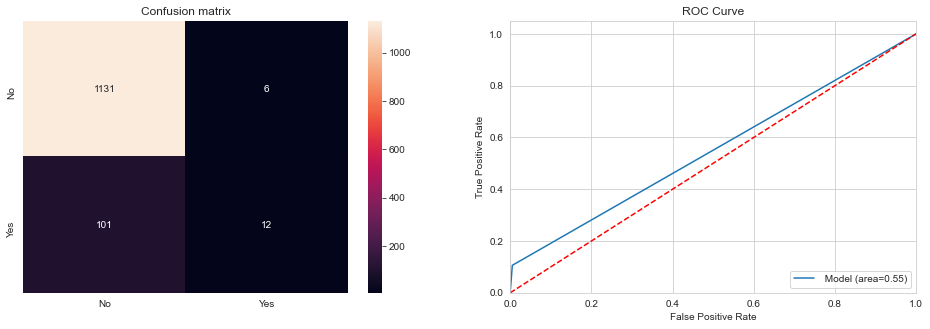

In [155]:
performance(xtest,ytest, model_svc)

#IMPROVING THE PERFORMANCE OF THE MODELS

R2-Score: 0.9464
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1137
           1       0.67      0.11      0.18       113


In [156]:
params = {'solver':['lbfgs','newton-cg'],'class_weight':[{0:0.5, 1:0.75}, {0:0.5, 1:0.5}, {0:0.2, 1:0.8},{0:0.8, 1:0.8},{0:0.9, 1:0.1},{0:0.1, 1:0.9}] }

Classification Report
------------------------------
R2-Score: 0.9464
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.82      0.61      0.70       113

    accuracy                           0.95      1250
   macro avg       0.89      0.80      0.84      1250
weighted avg       0.95      0.95      0.95      1250

------------------------------


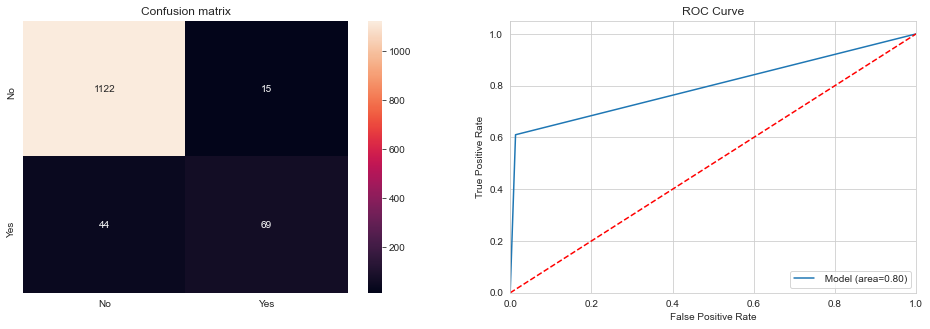

In [134]:
model_log1 = LogisticRegression(solver ='newton-cg',random_state=101,class_weight={0:0.5, 1:0.75}).fit(xtrain,ytrain)
performance(xtest,ytest,model_log1)

In [150]:
parmas = {'solver':['lbfgs','newton-cg'],'class_weight':[{0:0.5, 1:0.75},{0:0.5, 1:0.75},{0:0.2, 1:0.8},{0:0.8, 1:0.8},{0:0.9, 1:0.1},{0:0.1, 1:0.9}]}

In [157]:
gcv_legit = GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 1/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 2/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 3/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 4/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 5/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 1/5] END ....class_weight={0: 0.5, 1: 0.5}, solver=lbfgs; total time=   0.0s
[CV 2/5] END ....class_weight={0: 0.5, 1: 0

In [158]:
gcv_legit.best_params_

{'class_weight': {0: 0.8, 1: 0.8}, 'solver': 'newton-cg'}

Classification Report
------------------------------
R2-Score: 0.9464
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.86      0.57      0.68       113

    accuracy                           0.95      1250
   macro avg       0.91      0.78      0.83      1250
weighted avg       0.95      0.95      0.95      1250

------------------------------


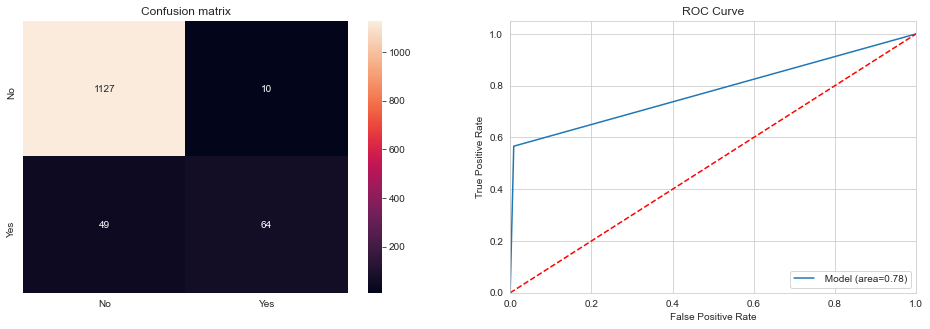

In [159]:
performance(xtest,ytest,gcv_legit.best_estimator_)

In [160]:
pd.DataFrame(gcv_legit.best_estimator_.coef_, index=['Coefficient'],columns=x.columns).T

Coefficient
Age                   -0.079742
Income                 0.051790
Experience             0.089982
CCAvg                  0.121470
Mortgage               0.000828
Family                 0.685185
Education              1.634057
Securities_Account    -0.659308
CD_Account             3.427122
Online                -0.676103
CreditCard            -0.914587

In [161]:
#DROPPING THE COLUMN WHICH ARE LESS RELAVENT

In [162]:
xtrain.columns

Index(['Age', 'Income', 'Experience', 'CCAvg', 'Mortgage', 'Family',
       'Education', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [163]:
xtrain1 = xtrain.drop(['Age','Experience','Securities_Account','Online', 'CreditCard'],axis=1)
xtest1 = xtest.drop(['Age','Experience','Securities_Account','Online', 'CreditCard'],axis=1)

In [164]:
gcv_legit1 = GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain1,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 1/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 2/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 3/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 4/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 5/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 1/5] END ....class_weight={0: 0.5, 1: 0.5}, solver=lbfgs; total time=   0.0s
[CV 2/5] END ....class_weight={0: 0.5, 1: 0

In [165]:
xtrain1 = xtrain.drop(['Age','Experience','Securities_Account','Online', 'CreditCard'],axis=1)
xtest1 = xtest.drop(['Age','Experience','Securities_Account','Online', 'CreditCard'],axis=1)

In [166]:
gcv_legit1 = GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain1,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=lbfgs; total time=   0.0s
[CV 1/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 2/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 3/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 4/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 5/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 1/5] END ....class_weight={0: 0.5, 1: 0.5}, solver=lbfgs; total time=   0.0s
[CV 2/5] END ....class_weight={0: 0.5, 1: 0

In [168]:
performance(xtest1,ytest,gcv_legit1.best_estimator_)

Classification Report
------------------------------


ValueError: X has 6 features per sample; expecting 11

# Logistic Regression with Statsmodel

In [170]:
xtrain_sm = sm.add_constant(xtrain)
xtest_sm = sm.add_constant(xtest)
model_sm_logit = sm.Logit(ytrain,xtrain_sm)
model_sm = model_sm_logit.fit(warn_convergence=False)

Optimization terminated successfully.
         Current function value: 0.126539
         Iterations 9


In [171]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3738
Method:                           MLE   Df Model:                           11
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.6050
Time:                        19:50:57   Log-Likelihood:                -474.52
converged:                       True   LL-Null:                       -1201.4
Covariance Type:            nonrobust   LLR p-value:                3.060e-305
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.3792      1.923     -5.918      0.000     -15.148      -7.610
Age                   -0.0787      0.072     -1.092      0.275      -0.220       0.063
Income                 0.0533      0.003     18.005      0.000       0.047       0.059
Experience             0.0889      0.072      1.242      0.214      -0.051       0.229
CCAvg                  0.1246      0.047      2.677      0.007       0.033       0.216
Mortgage               0.0008      0.001      1.234      0.217      -0.000       0.002
Family                 0.7079      0.087      8.147      0.000       0.538       0.878
Education              1.7056      0.132     12.893      0.000       1.446       1.965
Securities_Account    -1.0216      0.344     -2.968      0.003      -1.696      -0.347
CD_Account             4.1492      0.385     10.790      0.000       3.396       4.903
Online                -0.8047      0.182     -4.415      0.000      -1.162      -0.447
CreditCard            -1.1876      0.242     -4.911      0.000      -1.661      -0.714
======================================================================================
"""

In [172]:
xtrain_sm2 = sm.add_constant(xtrain.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis=1))
xtest_sm2 = sm.add_constant(xtest.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis=1))
model_sm_logit2 = sm.Logit(ytrain,xtrain_sm2)
model_sm2 = model_sm_logit2.fit(warn_convergence=False)

Optimization terminated successfully.
         Current function value: 0.133477
         Iterations 9


In [173]:
model_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.5834
Time:                        19:51:34   Log-Likelihood:                -500.54
converged:                       True   LL-Null:                       -1201.4
Covariance Type:            nonrobust   LLR p-value:                5.908e-301
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.6634      0.625    -21.876      0.000     -14.888     -12.439
Income         0.0536      0.003     18.887      0.000       0.048       0.059
CCAvg          0.1063      0.045      2.378      0.017       0.019       0.194
Family         0.7086      0.084      8.403      0.000       0.543       0.874
Education      1.6511      0.126     13.153      0.000       1.405       1.897
CD_Account     2.6965      0.264     10.212      0.000       2.179       3.214
==============================================================================
"""

In [174]:
xtrain_sm2 = sm.add_constant(xtrain.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis=1))
xtest_sm2 = sm.add_constant(xtest.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis=1))
model_sm_logit2 = sm.Logit(ytrain,xtrain_sm2)
model_sm2 = model_sm_logit2.fit(warn_convergence=False)

Optimization terminated successfully.
         Current function value: 0.133477
         Iterations 9


In [175]:
model_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.5834
Time:                        19:52:51   Log-Likelihood:                -500.54
converged:                       True   LL-Null:                       -1201.4
Covariance Type:            nonrobust   LLR p-value:                5.908e-301
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.6634      0.625    -21.876      0.000     -14.888     -12.439
Income         0.0536      0.003     18.887      0.000       0.048       0.059
CCAvg          0.1063      0.045      2.378      0.017       0.019       0.194
Family         0.7086      0.084      8.403      0.000       0.543       0.874
Education      1.6511      0.126     13.153      0.000       1.405       1.897
CD_Account     2.6965      0.264     10.212      0.000       2.179       3.214
==============================================================================
"""

In [176]:
ypred_sm = model_sm2.predict(xtest_sm2)>0.1

In [177]:
from sklearn.metrics import accuracy_score

In [178]:
accuracy_score(ytest,ypred_sm)*100

89.2

In [179]:
print(classification_report(ytest,ypred_sm))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1137
           1       0.45      0.88      0.60       113

    accuracy                           0.89      1250
   macro avg       0.72      0.89      0.77      1250
weighted avg       0.94      0.89      0.91      1250



In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
xtrain_sc = pd.DataFrame(StandardScaler().fit_transform(xtrain),columns=x.columns,index=xtrain.index)
xtest_sc = pd.DataFrame(StandardScaler().fit_transform(xtest),columns=x.columns,index=xtest.index)

In [183]:
xtrain_sm3 = sm.add_constant(xtrain_sc.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis=1))
xtest_sm3 = sm.add_constant(xtest_sc.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis=1))


In [184]:
model_sm_logit3 = sm.Logit(ytrain,xtrain_sm3)
model_sm3 = model_sm_logit3.fit(warn_convergence=False)

Optimization terminated successfully.
         Current function value: 0.133477
         Iterations 9


In [185]:
model_sm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.5834
Time:                        19:55:26   Log-Likelihood:                -500.54
converged:                       True   LL-Null:                       -1201.4
Covariance Type:            nonrobust   LLR p-value:                5.908e-301
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5136      0.175    -25.825      0.000      -4.856      -4.171
Income         2.4751      0.131     18.887      0.000       2.218       2.732
CCAvg          0.1868      0.079      2.378      0.017       0.033       0.341
Family         0.8175      0.097      8.403      0.000       0.627       1.008
Education      1.3922      0.106     13.153      0.000       1.185       1.600
CD_Account     0.6470      0.063     10.212      0.000       0.523       0.771
==============================================================================
"""

In [186]:
ypred_sm3 = model_sm3.predict(xtest_sm3)>0.15

In [187]:
accuracy_score(ytest,ypred_sm3)*100

90.4

In [188]:
print(classification_report(ytest,ypred_sm3))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1137
           1       0.48      0.87      0.62       113

    accuracy                           0.90      1250
   macro avg       0.73      0.89      0.78      1250
weighted avg       0.94      0.90      0.92      1250



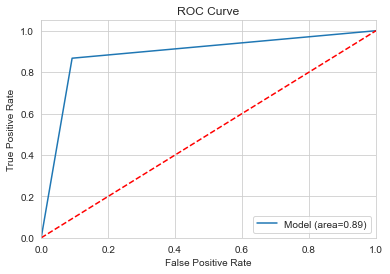

In [190]:
rocAuc = roc_auc_score(ytest, ypred_sm3)
fpr,tpr,th = roc_curve(ytest, ypred_sm3)
# plt.subplot(1,2,2)
plt.plot(fpr,tpr, label = 'Model (area=%0.2f)'%rocAuc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.show()

Improving/Visualizing Decision Trees

In [192]:
from sklearn import tree

In [193]:
def build_tree(model,size=(30,30)):
    plt.figure(figsize=size)
    out = tree.plot_tree(model, feature_names=x.columns, filled=True, fontsize=15,node_ids=True,class_names=True,)
    for p in out:
        arrow = p.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor('black')
            arrow.set_linewidth(1)
    plt.show()

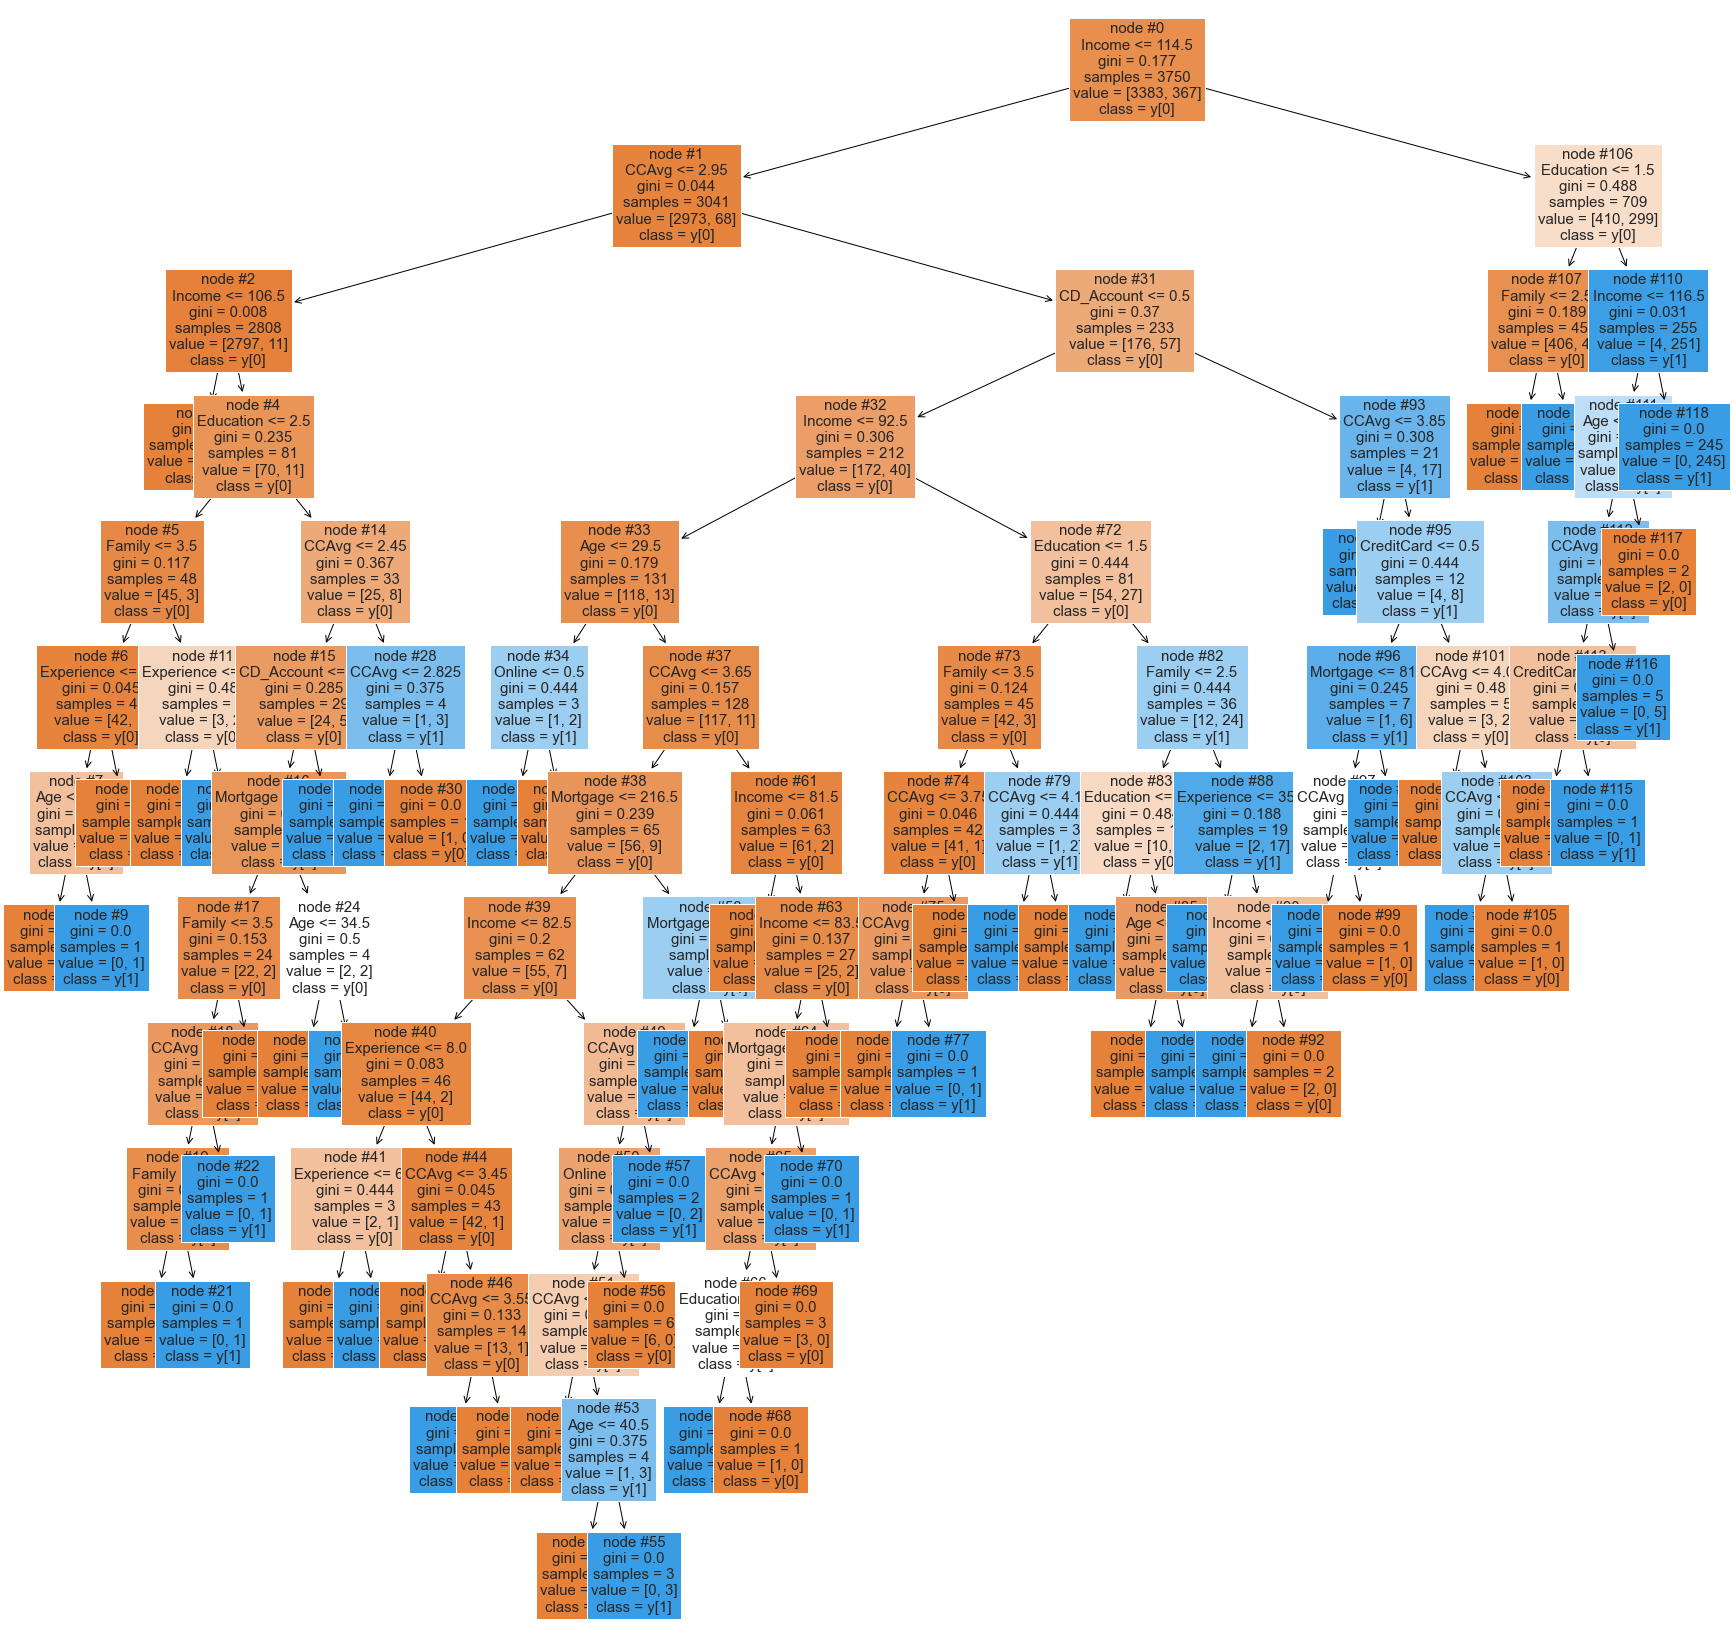

In [194]:
# Build the tree
build_tree(model_dt)

In [195]:
def show_important(model):
    importance = model.feature_importances_
    idx = np.argsort(importance)
    plt.figure(figsize=(12,8))
    plt.title('Feature Importance')
    plt.barh(range(len(idx)), importance[idx], color='purple', align='center')
    plt.yticks(range(len(idx)), [x.columns[i] for i in idx])
    plt.xlabel('Importance')

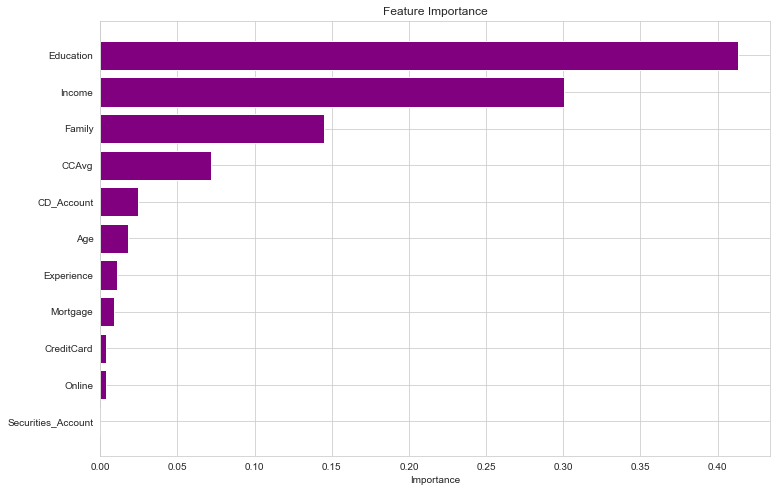

In [196]:
show_important(model_dt)

In [197]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [198]:

params_dt = {'criterion':['gini','entropy'], 
         'min_samples_leaf':[1,2,5,7,11,15,20,25],
         'max_depth':np.arange(1,10),
         'max_leaf_nodes':[5,10,15,20,25,30,35]}

In [199]:
model_grid_dt_1 = GridSearchCV(DecisionTreeClassifier(), param_grid=params_dt,).fit(xtrain,ytrain)

In [200]:
model_grid_dt_1.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 11}

Classification Report
------------------------------
R2-Score: 0.9464
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.94      0.85      0.89       113

    accuracy                           0.98      1250
   macro avg       0.96      0.92      0.94      1250
weighted avg       0.98      0.98      0.98      1250

------------------------------


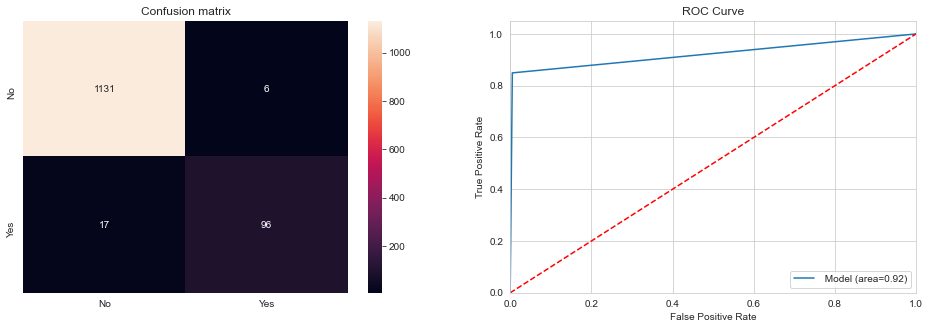

In [201]:
performance(xtest,ytest,model_grid_dt_1.best_estimator_)

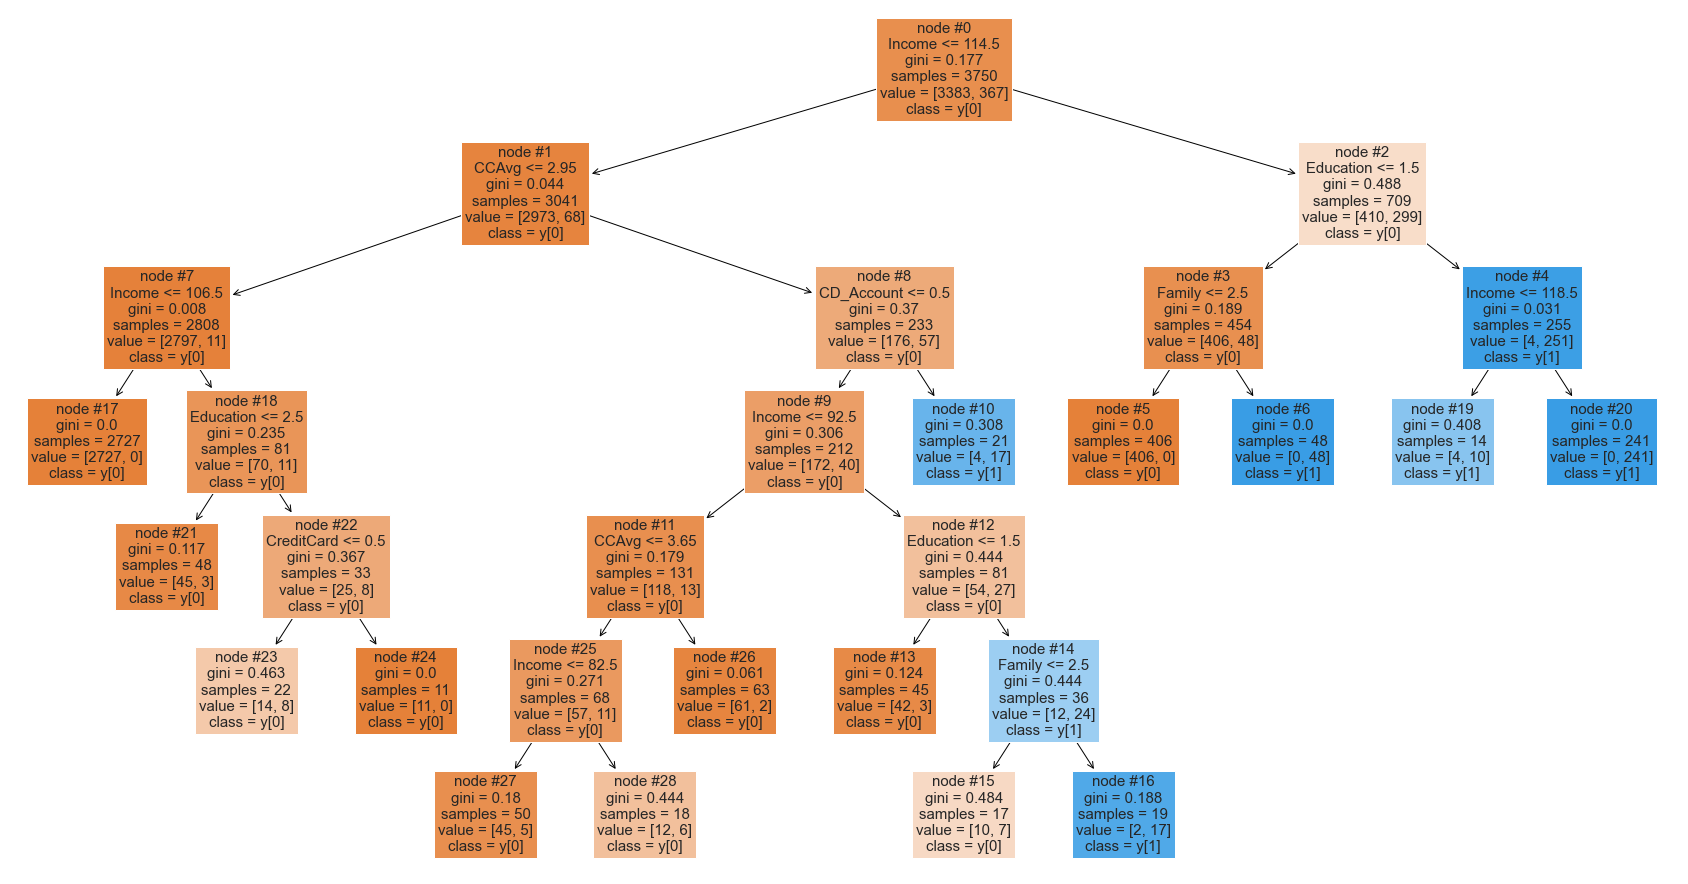

In [202]:
# Build the tree
build_tree(model_grid_dt_1.best_estimator_,(30,16))

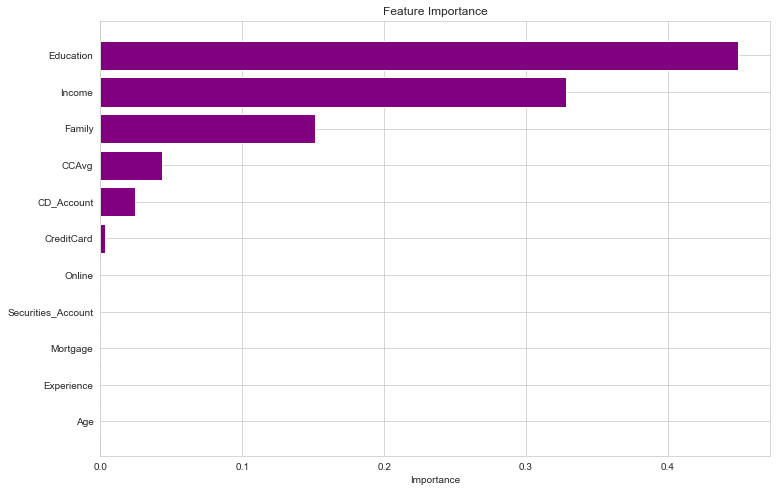

In [203]:
show_important(model_grid_dt_1.best_estimator_)


Improving/Visualizing Random Forest

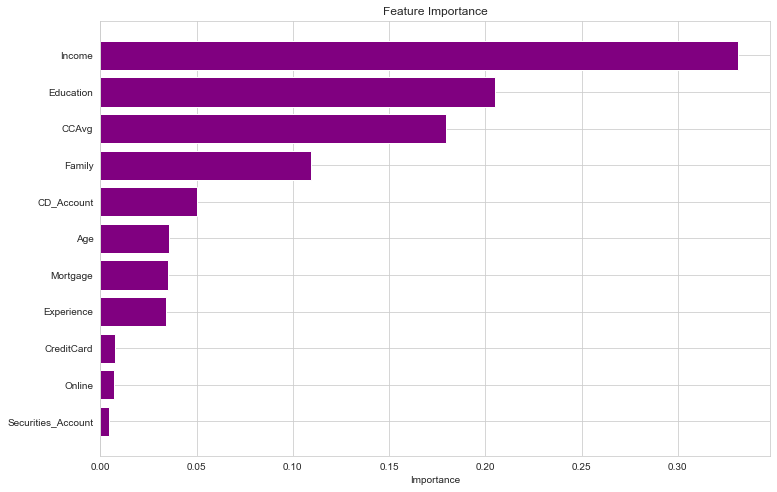

In [204]:
show_important(model_rf)

In [205]:
params_rf = {'n_estimators':np.arange(2,151,5),
        'criterion':['gini','entropy'], 
         'min_samples_leaf':[1,2,5,7,11,15,20,25],
         'max_depth':np.arange(1,10),
         'max_leaf_nodes':[5,10,15,20,25,30,35]}

In [ ]:
model_grid_rf_1 = GridSearchCV(RandomForestClassifier(), param_grid=params_rf,verbose=3).fit(xtrain,ytrain)

Fitting 5 folds for each of 30240 candidates, totalling 151200 fits
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=7; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=7; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=7; total time=   0.0s
[CV 4/5] END

In [ ]:
performance(xtest,ytest,model_grid_rf_1.best_estimator_)

In [ ]:
show_important(model_grid_rf_1.best_estimator_)

In [ ]:
params_svc = {'C':[1000,100,10,1,0.1,0.01,0.001,0.0001],'gamma':[10,1,0.1,0.01,0.001,0.0001],'kernel':['linear','rbf']}

In [ ]:
model_grid_svc_1 = GridSearchCV(SVC(), param_grid = params_svc, verbose=3).fit(xtrain,ytrain)

In [ ]:
performance(xtest,ytest,model_grid_svc_1.best_estimator_)